# Monday, March 31st

## Image denoising

Last week, we developed some code to apply the mean and median filter using `3` by `3` grids and ignoring the left/right/top/bottom edges of the image:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We read in a sample image and converted to grayscale by averaging the RGB values:

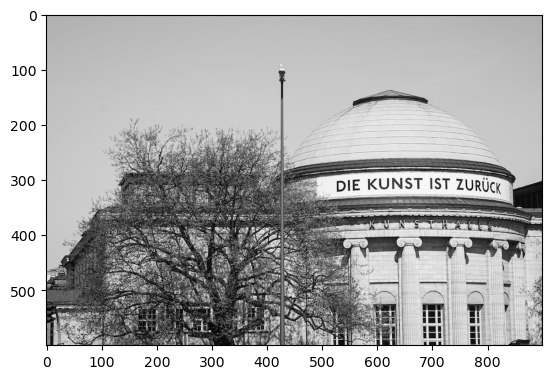

In [2]:
hamburg = plt.imread('hamburg.png')

hamburg_gray = hamburg.mean(axis=2)
plt.imshow(hamburg_gray,cmap='gray',vmin=0,vmax=1)

We copied the `hamburg_gray` array before adding noise. We used Boolean arrays to identify which pixels will be hit with salt noise and which will be hit with pepper noise.

In [3]:
noisy_hamburg = hamburg_gray.copy()
num_rows, num_cols = hamburg_gray.shape
random_array = np.random.random((num_rows, num_cols))

# Let's generate an Boolean array with True in the locations that we want
# to add salt noise and False everywhere else
salt_mask = (random_array > .9)

# Then, we can use `salt_mask` as a slice on the `noisy_hamburg` array:
noisy_hamburg[salt_mask] = 1

# Do the same thing for pepper noise:
pepper_mask = (random_array < .1)
noisy_hamburg[pepper_mask] = 0

**Note:** The cell above is a useful skeleton for writing the `sp_noise` function described in the project page. It requires some modification to take inputs `img` and `noise`, where `img` is the image array that will have noise added to it, and `noise` measures the total proportion of pixels that will be hit by salt or pepper noise.

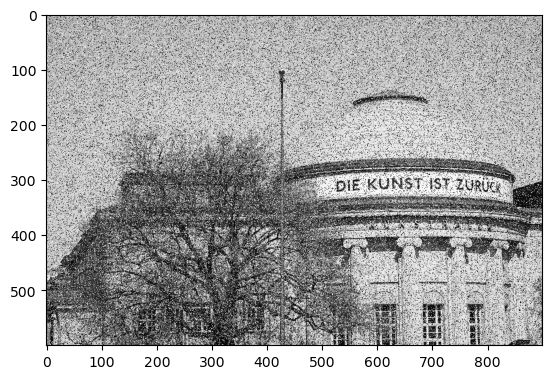

In [4]:
plt.imshow(noisy_hamburg, cmap='gray',vmin=0,vmax=1)

We then applied the mean filter using `3` by `3` grids, ignoring the left/right/top/bottom edges of the image:

In [5]:
filtered_hamburg = noisy_hamburg.copy()

# For now, we need to skip the first row and last row
for i in range(1,num_rows-1):
    # We also need to skip the first column and last column
    for j in range(1, num_cols-1):
        grid = noisy_hamburg[i-1:i+2, j-1:j+2]
        mean = np.mean(grid)

        filtered_hamburg[i,j] = mean

Text(0.5, 1.0, 'Mean filter')

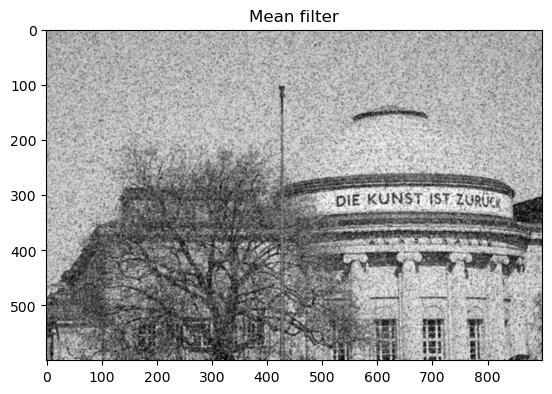

In [6]:
plt.imshow(filtered_hamburg,cmap='gray',vmin=0,vmax=1)
plt.title('Mean filter')

We also applied the median filter:

In [7]:
filtered_hamburg = noisy_hamburg.copy()

# For now, we need to skip the first row and last row
for i in range(1,num_rows-1):
    # We also need to skip the first column and last column
    for j in range(1, num_cols-1):
        grid = noisy_hamburg[i-1:i+2, j-1:j+2]
        median = np.median(grid)
        
        filtered_hamburg[i,j] = median

Text(0.5, 1.0, 'Median filter')

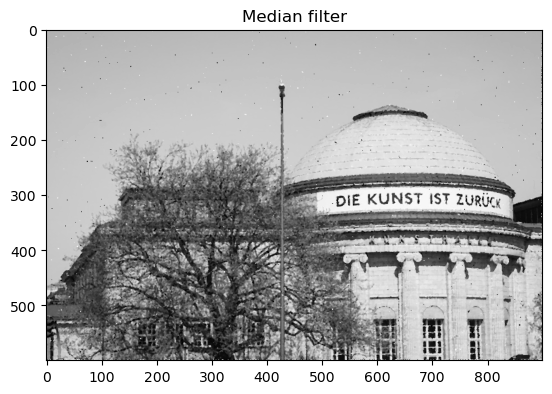

In [8]:
plt.imshow(filtered_hamburg,cmap='gray',vmin=0,vmax=1)
plt.title('Median filter')

## Some updates:

Let's write a `mean_filter` function based on the mean filter code above:

In [9]:
def mean_filter(noisy_img):
    filtered_img = noisy_img.copy()
    num_rows, num_cols = noisy_img.shape

    # For now, we need to skip the first row and last row
    for i in range(1,num_rows-1):
        # We also need to skip the first column and last column
        for j in range(1, num_cols-1):
            grid = noisy_img[i-1:i+2, j-1:j+2]
            mean = np.mean(grid)

            filtered_img[i,j] = mean
            
    return filtered_img

Can we write a `median_filter` function as well?

In [12]:
def median_filter(noisy_img):
    filtered_img = noisy_img.copy()
    num_rows, num_cols = noisy_img.shape

    # For now, we need to skip the first row and last row
    for i in range(1,num_rows-1):
        # We also need to skip the first column and last column
        for j in range(1, num_cols-1):
            grid = noisy_img[i-1:i+2, j-1:j+2]
            median = np.median(grid)

            filtered_img[i,j] = median
            
    return filtered_img

In [13]:
filtered_hamburg = median_filter(noisy_hamburg)

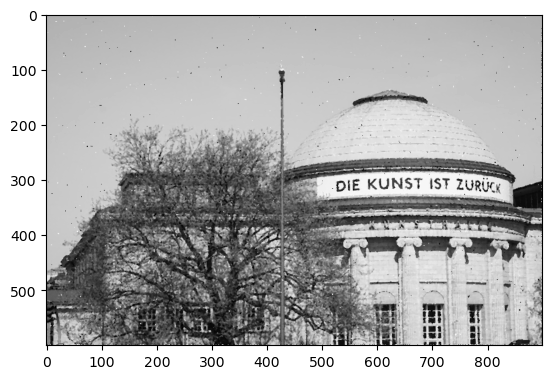

In [14]:
plt.imshow(filtered_hamburg, cmap='gray', vmin=0, vmax=1)

**Note**: We could combine these two functions into a singler `filter` function that takes in a noisy image array (`noisy_img`) along some function (`filter_func`) that will be applied to each grid.

The `filter_func` input should be a function that takes in an 2D array and returns a float.

In [16]:
def img_filter(noisy_img, filter_func=np.mean):
    filtered_img = noisy_img.copy()
    num_rows, num_cols = noisy_img.shape

    # For now, we need to skip the first row and last row
    for i in range(1,num_rows-1):
        # We also need to skip the first column and last column
        for j in range(1, num_cols-1):
            grid = noisy_img[i-1:i+2, j-1:j+2]
            filtered_img[i,j] = filter_func(grid)
            
    return filtered_img

In [17]:
mean_filtered_hamburg = img_filter(noisy_hamburg, np.mean)
median_filtered_hamburg = img_filter(noisy_hamburg, np.median)

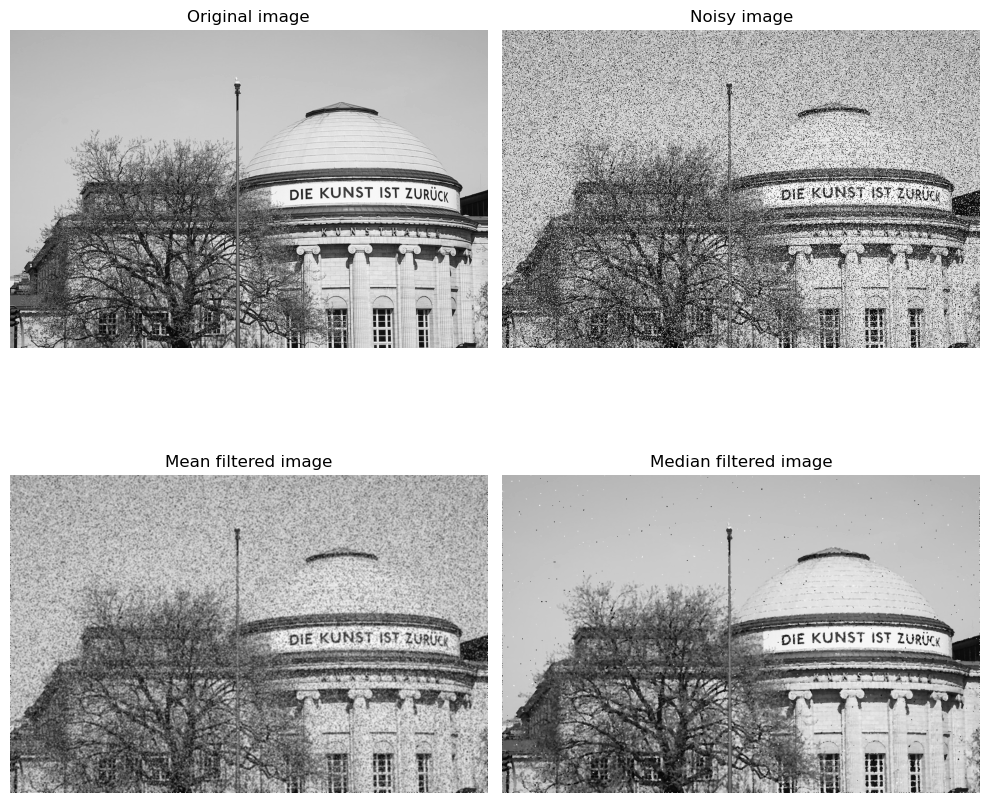

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(hamburg_gray,cmap='gray',vmin=0,vmax=1)
plt.title('Original image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(noisy_hamburg,cmap='gray',vmin=0,vmax=1)
plt.title('Noisy image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(mean_filtered_hamburg,cmap='gray',vmin=0,vmax=1)
plt.title('Mean filtered image')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(median_filtered_hamburg,cmap='gray',vmin=0,vmax=1)
plt.title('Median filtered image')
plt.axis('off')

plt.tight_layout()

## Edge pixels

Until now, we've simply ignored filtering of edge pixels. Let's try to deal with them now.

The project page discusses adding extra rows/columns to our array so that we are able to construct a `3` by `3` grid centered at all pixels of our original image.

If we are using `3` by `3` grids, we need to add one extra row/column on all sides.

In [22]:
num_rows, num_cols = noisy_hamburg.shape

# Define a larger array with an extra on top/bottom
# and an extra column on left/right
padded_img = np.zeros((num_rows+2, num_cols+2))

# Place the noisy array in the center of the padded array
padded_img[1:-1, 1:-1] = noisy_hamburg

Now, we want to apply our mean filter to this `padded_img` array. We need to be careful about our indexing:

In [25]:
filtered_img = np.zeros((num_rows, num_cols))

for i in range(num_rows):
    for j in range(num_cols):
        grid = padded_img[i:i+3, j:j+3]
        filtered_img[i,j] = np.mean(grid)

(-0.5, 899.5, 599.5, -0.5)

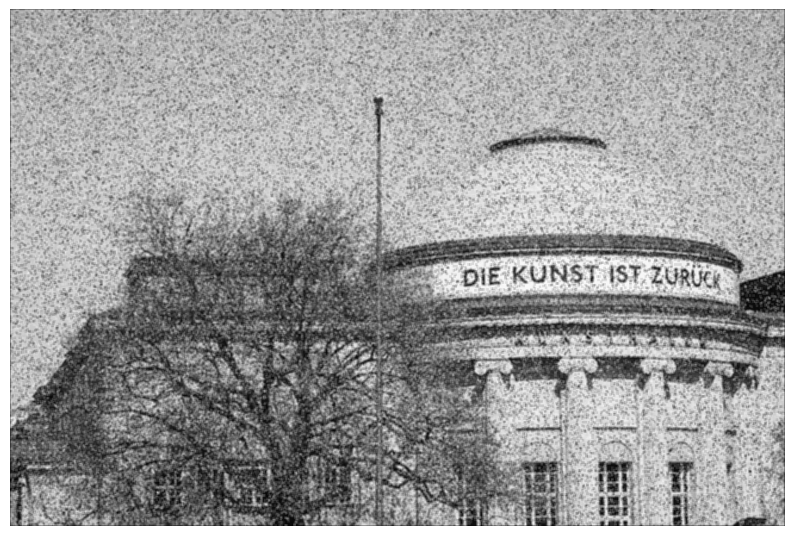

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(filtered_img, cmap='gray',vmin=0,vmax=1)
plt.axis('off')

**Note**: We have added black border to the `padded_img` (since we used `np.zeros`), which propogates into the `filtered_img` when we take any mean that includes padded pixels.

We could instead add a white border (by using `np.ones`), but that's no better off. We could split the difference by using `np.ones(...)/2` to use a gray border.

**Note**: To implement this strategy of dealing with edge pixels, we will need update our `mean_filter`/`median_filter`/`img_filter` functions. It will helpful to first a `get_padded_img` function that takes in an array and returns a padded version.

## Grid size

What needs to change if we want to use grids of different sizes, say `s=3`, `s=5`, `s=7`, ...?

Let's try `5` by `5` grids:

In [34]:
filtered_hamburg = noisy_hamburg.copy()

# For now, we need to skip the first row and last row
for i in range(2,num_rows-2):
    # We also need to skip the first column and last column
    for j in range(2, num_cols-2):
        grid = noisy_hamburg[i-2:i+3, j-2:j+3]
        mean = np.mean(grid)

        filtered_hamburg[i,j] = mean

(-0.5, 899.5, 599.5, -0.5)

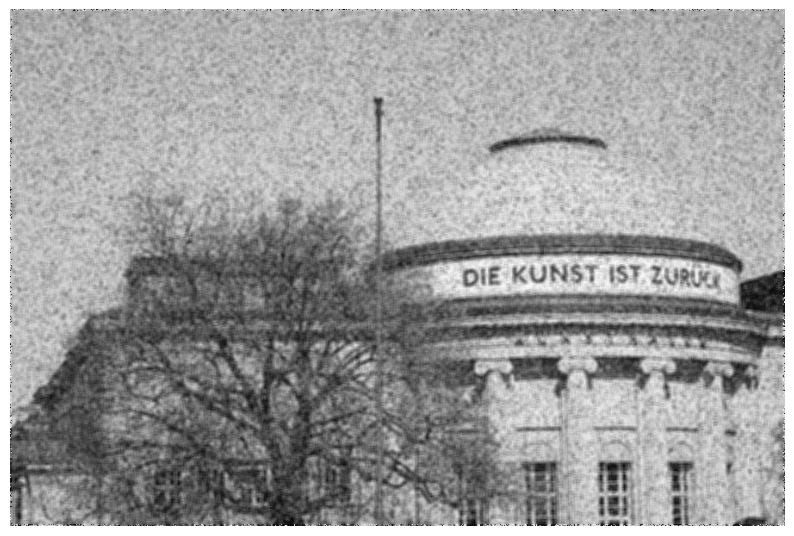

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(filtered_hamburg, cmap='gray',vmin=0,vmax=1)
plt.axis('off')

What about `7` by `7` grids?

In [36]:
filtered_hamburg = noisy_hamburg.copy()

# For now, we need to skip the first row and last row
for i in range(3,num_rows-3):
    # We also need to skip the first column and last column
    for j in range(3, num_cols-3):
        grid = noisy_hamburg[i-3:i+4, j-3:j+4]
        mean = np.mean(grid)

        filtered_hamburg[i,j] = mean

(-0.5, 899.5, 599.5, -0.5)

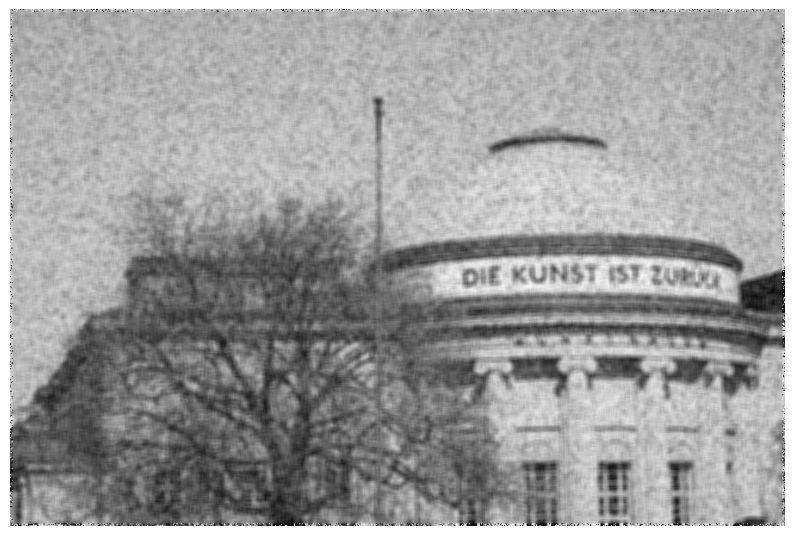

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(filtered_hamburg, cmap='gray',vmin=0,vmax=1)
plt.axis('off')

**Exercise:** Modify the examples above to take in a paramter `s`, which is an odd integer, and apply the mean filter using an `s` by `s` grid. You can skip any rows/columns along the edge as necessary.

**Exercise**: Once you've done this, combine it with the earlier discussion on filtered edge pixels.